# Sinusoidal Data

In [26]:
import numpy as np
import kal_exp
import matplotlib.pyplot as plt
from scipy import sparse

sigma_z = .1
sigma_x = 1

z1, x_true1, x_dot_true1, H1, times1 = kal_exp.gen_sine(
    20, stop=6, nt=20, meas_var=sigma_z
)
z2, x_true2, x_dot_true2, H2, times2 = kal_exp.gen_sine(
    20, stop=6, nt=40, meas_var=sigma_z
)

def plot_sol(times, z, x_true, x_dot_true, x_hat, x_dot_hat, title=""):
    fig = plt.figure(figsize=[6,3])
    fig.suptitle(title)
    fig.add_subplot(1,2,1)
    plt.plot(times, x_true, label="true")
    plt.plot(times, z, "rx")
    plt.plot(times, x_hat, label="estimated")
    plt.legend()

    fig.add_subplot(1,2,2)
    plt.plot(times, x_dot_true, label="true")
    plt.plot(times, x_dot_hat, label="estimated")
    plt.legend()

## Show Basic Kalman Method works

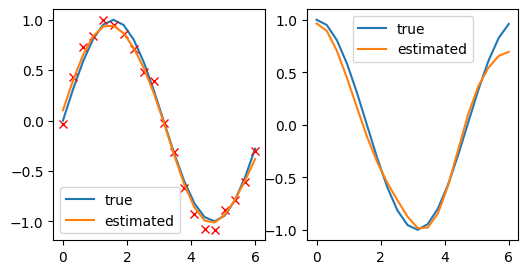

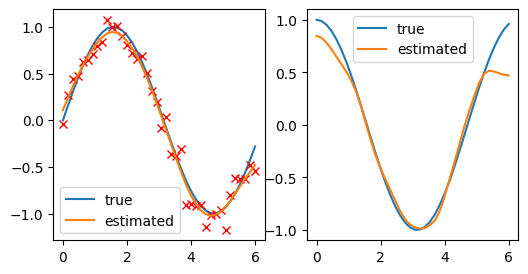

In [27]:
x_hat1, x_dot_hat1, _, _ = kal_exp.solve(z1, H1, times1, sigma_z, sigma_x)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _ = kal_exp.solve(z2, H2, times2, sigma_z, sigma_x)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2)

## Does Marginal Likelihood work, and does it improve with more data?

feval: 95.802 σ² estimated as 5.5e+01
feval: 93.788 σ² estimated as 3.2e+01
feval: 92.928 σ² estimated as 2.1e+01
feval: 92.873 σ² estimated as 1.6e+01
feval: 92.835 σ² estimated as 1.8e+01
feval: 92.833 σ² estimated as 1.7e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.83 σ² estimated as 1.7e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829 σ² estimated as 1.8e+01
feval: 92.829

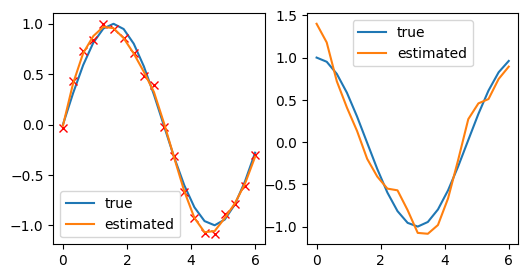

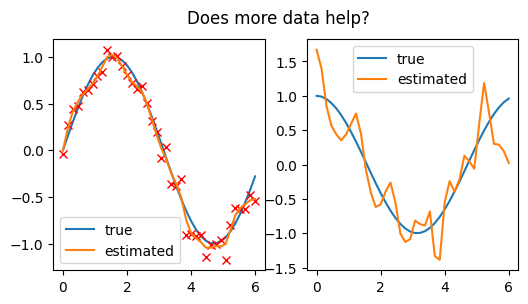

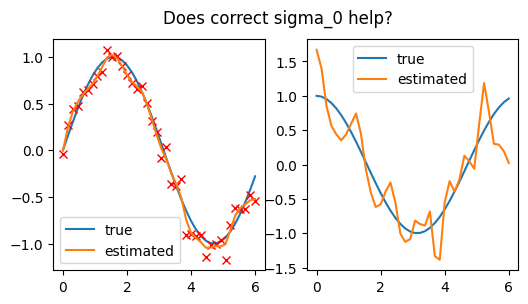

In [28]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_marginal(
    z1, H1, times1, sigma_z, sigma0=.1
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=.1
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2, "Does more data help?")

x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=sigma_x
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b, "Does correct sigma_0 help?")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b)

### Conclusions:
More data, if anything has a deletrious effect, as sigma_hat goes from 17 to 69.  Starting with the correct sigma_0 doesn't help

## Does MAP work, and does it improve with more data?

/home/xenophon/github/kalman-experiments/kal_exp/__init__.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = abs_err / max(np.linalg.norm(x), 1e-2)


feval:  inf
feval:  [[16.6364503]]
feval:  [[13.98149659]]
linesearch not found
decreasing learning rate to  0.0001
feval:  [[21.52192764]]
linesearch not found
decreasing learning rate to  1e-05
feval:  [[73.66308577]]
feval:  [[71.20588362]]
feval:  [[70.94593046]]
feval:  [[70.6839364]]
feval:  [[70.41986369]]
feval:  [[70.1536736]]
feval:  [[69.88532632]]
feval:  [[69.61478102]]
feval:  [[69.34199571]]
feval:  [[69.06692729]]
feval:  [[68.78953146]]
feval:  [[68.5097627]]
feval:  [[68.2275742]]
feval:  [[67.94291787]]
feval:  [[67.65574422]]
feval:  [[67.36600235]]
feval:  [[67.07363993]]
feval:  [[66.77860307]]
feval:  [[66.48083633]]
feval:  [[66.18028263]]
feval:  [[65.87688322]]
feval:  [[65.57057755]]
feval:  [[65.2613033]]
feval:  [[64.94899622]]
feval:  [[64.63359013]]
feval:  [[64.31501678]]
feval:  [[63.99320585]]
feval:  [[63.66808479]]
feval:  [[63.33957877]]
feval:  [[63.00761062]]
feval:  [[62.67210069]]
feval:  [[62.33296676]]
feval:  [[61.99012398]]
feval:  [[61.6434

/home/xenophon/github/kalman-experiments/kal_exp/__init__.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = abs_err / max(np.linalg.norm(x), 1e-2)


feval:  inf
feval:  [[32.40559751]]
linesearch not found
decreasing learning rate to  0.0001
feval:  [[46.96416259]]
linesearch not found
decreasing learning rate to  1e-05
feval:  [[400.10937238]]
feval:  [[398.54718314]]
feval:  [[398.39094503]]
feval:  [[398.2347]]
feval:  [[398.07844794]]
feval:  [[397.92218874]]
feval:  [[397.76592228]]
feval:  [[397.60964846]]
feval:  [[397.45336717]]
feval:  [[397.29707828]]
feval:  [[397.14078169]]
feval:  [[396.98447729]]
feval:  [[396.82816495]]
feval:  [[396.67184457]]
feval:  [[396.51551604]]
feval:  [[396.35917923]]
feval:  [[396.20283403]]
feval:  [[396.04648033]]
feval:  [[395.890118]]
feval:  [[395.73374695]]
feval:  [[395.57736705]]
feval:  [[395.42097817]]
feval:  [[395.26458022]]
feval:  [[395.10817307]]
feval:  [[394.95175659]]
feval:  [[394.79533069]]
feval:  [[394.63889523]]
feval:  [[394.4824501]]
feval:  [[394.32599517]]
feval:  [[394.16953035]]
feval:  [[394.01305549]]
feval:  [[393.85657049]]
feval:  [[393.70007521]]
feval:  [

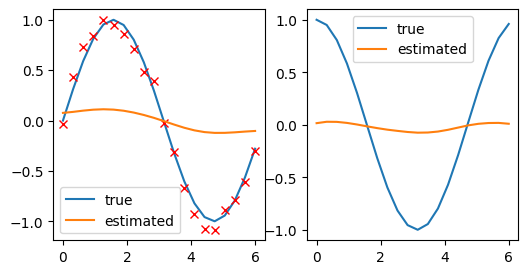

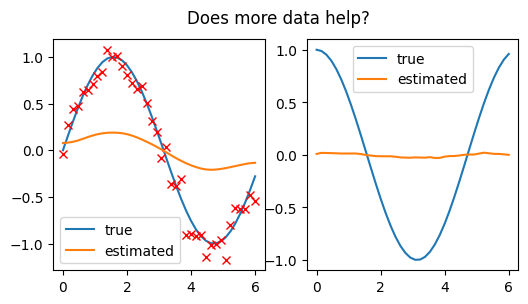

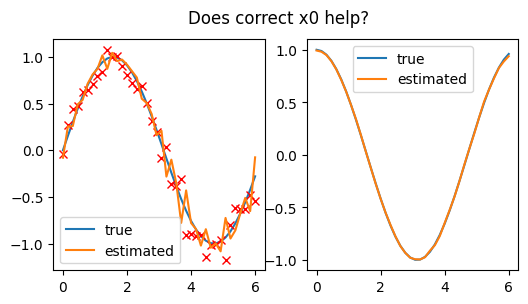

In [33]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_prior(
    z1, H1, times1, sigma_z, maxiter=10000
)

plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2, "Does more data help?")

x0=kal_exp.restack(x_true2, x_dot_true2).reshape((-1,1))
x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, x0=x0, maxiter=10000
)

plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b, "Does correct x0 help?")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b)

### Conclusions
More data doesn't help (sigma_hat goes higher with more data, beyond 1).  starting with the correct x0 makes the solution stay close, the calculated sigma0 is odd.  Maybe this is stopping too soon?  Maybe hard to tell because there is no true sigma in this case?

# Brownian Simulated Data

In [39]:
z1, x_true1, x_dot_true1, H1, times1 = kal_exp.gen_data(
    30, stop=6, nt=20, meas_var=sigma_z, process_var=sigma_x
)
z2, x_true2, x_dot_true2, H2, times2 = kal_exp.gen_data(
    30, stop=6, nt=40, meas_var=sigma_z
)
z3, x_true3, x_dot_true3, H3, times3 = kal_exp.gen_data(
    30, stop=6, nt=60, meas_var=sigma_z
)

## Basic Kalman Smoothing

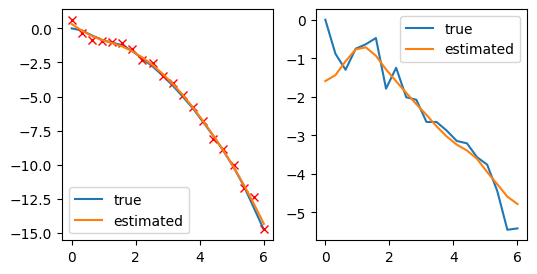

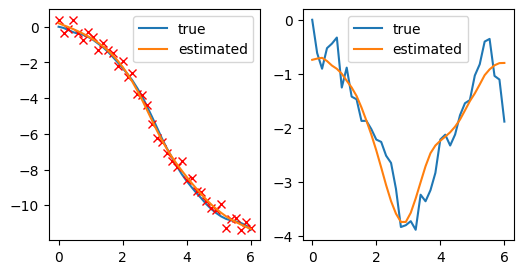

In [36]:
x_hat1, x_dot_hat1, _, _ = kal_exp.solve(z1, H1, times1, sigma_z, sigma_x)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _ = kal_exp.solve(z2, H2, times2, sigma_z, sigma_x)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2)


## Marginal, increasing timestep

feval: 97.474 σ² estimated as 5.5e+01
feval: 96.618 σ² estimated as 3.2e+01
feval: 97.256 σ² estimated as 2.1e+01
feval: 96.727 σ² estimated as 2.7e+01
feval: 96.637 σ² estimated as 3e+01
feval: 96.62 σ² estimated as 3.1e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ² estimated as 3.2e+01
feval: 96.617 σ

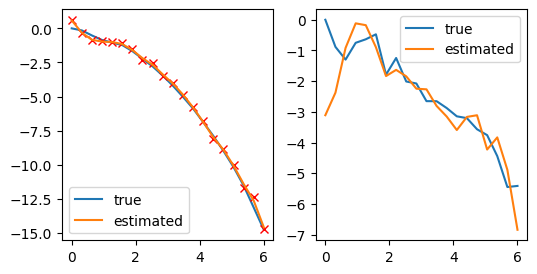

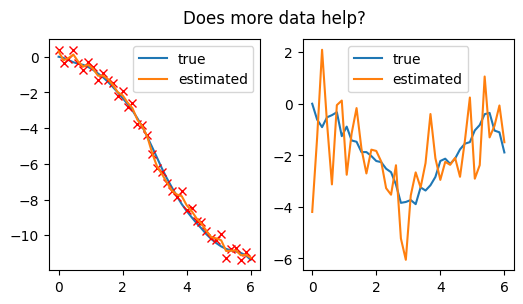

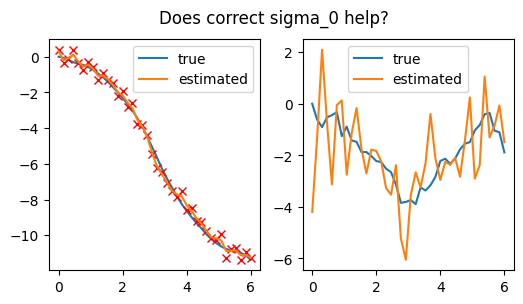

In [37]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_marginal(
    z1, H1, times1, sigma_z, sigma0=.1
)
plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=.1
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2, "Does more data help?")

x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_marginal(
    z2, H2, times2, sigma_z, sigma0=sigma_x
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b, "Does correct sigma_0 help?")

print(sigma_hat_1, sigma_hat_2, sigma_hat_2b)

### Conclusions
As seen in the sinusoidal case, while it "fits" the data, it does not find the correct sigma and more data (or an exact sigma0 guess) does not help

## MAP, increasing Data

/home/xenophon/github/kalman-experiments/kal_exp/__init__.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = abs_err / max(np.linalg.norm(x), 1e-2)


feval:  inf
feval:  [[16.6364503]]
feval:  [[-321.66633497]]
feval:  [[-631.15503532]]
feval:  [[-943.60806555]]
feval:  [[-1253.21543274]]
feval:  [[-1542.91273162]]
feval:  [[-1822.78407647]]
feval:  [[-2092.89997849]]
feval:  [[-2353.36163442]]
feval:  [[-2604.32898272]]
feval:  [[-2846.01154186]]
feval:  [[-3078.65138139]]
feval:  [[-3302.51052551]]
feval:  [[-3517.86215307]]
feval:  [[-3724.98452116]]
feval:  [[-3924.15677205]]
feval:  [[-4115.65603595]]
feval:  [[-4299.75543003]]
feval:  [[-4476.72268376]]
feval:  [[-4646.81920639]]
feval:  [[-4810.29947005]]
feval:  [[-4967.4106201]]
feval:  [[-5118.39225058]]
feval:  [[-5263.47630034]]
feval:  [[-5402.88703754]]
feval:  [[-5536.8411093]]
feval:  [[-5665.54763899]]
feval:  [[-5789.20835834]]
feval:  [[-5908.0177647]]
feval:  [[-6022.16329612]]
feval:  [[-6131.82551867]]
feval:  [[-6237.1783218]]
feval:  [[-6338.38911842]]
feval:  [[-6435.61904724]]
feval:  [[-6529.02317546]]
feval:  [[-6618.75070028]]
feval:  [[-6704.9451481]]
f

/home/xenophon/github/kalman-experiments/kal_exp/__init__.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = abs_err / max(np.linalg.norm(x), 1e-2)


feval:  inf
feval:  [[32.40559751]]
feval:  [[-615.69799627]]
feval:  [[-1058.00197339]]
feval:  [[-1757.8486947]]
feval:  [[-2435.14798134]]
feval:  [[-3094.78865655]]
feval:  [[-3745.96183998]]
feval:  [[-4346.41922002]]
feval:  [[-4891.19086748]]
feval:  [[-5413.21909207]]
feval:  [[-5917.20673198]]
feval:  [[-6400.04447326]]
feval:  [[-6864.54260189]]
feval:  [[-7311.16008127]]
feval:  [[-7740.57892287]]
feval:  [[-8153.40633529]]
feval:  [[-8550.24021648]]
feval:  [[-8931.66519496]]
feval:  [[-9298.25096481]]
feval:  [[-9650.5512269]]
feval:  [[-9989.10305014]]
feval:  [[-10314.42654087]]
feval:  [[-10627.02473843]]
feval:  [[-10927.3836769]]
feval:  [[-11215.97256844]]
feval:  [[-11493.2440752]]
feval:  [[-11759.63464513]]
feval:  [[-12015.56489312]]
feval:  [[-12261.44001359]]
feval:  [[-12497.65021363]]
feval:  [[-12724.57115891]]
feval:  [[-12942.56442592]]
feval:  [[-13151.97795593]]
feval:  [[-13353.14650703]]
feval:  [[-13546.3921015]]
feval:  [[-13732.02446639]]
feval:  [[

/home/xenophon/github/kalman-experiments/kal_exp/__init__.py:312: RuntimeWarning: divide by zero encountered in double_scalars
  rel_err = abs_err / max(np.linalg.norm(x), 1e-2)


feval:  inf
feval:  [[48.17474472]]
feval:  [[-400.6614318]]
feval:  [[-551.66547082]]
feval:  [[-1178.68058735]]
feval:  [[-1783.19824095]]
feval:  [[-2366.86673997]]
feval:  [[-2931.76969298]]
feval:  [[-3480.98017403]]
feval:  [[-4020.20170853]]
feval:  [[-4564.13734604]]
feval:  [[-5127.13975781]]
feval:  [[-5543.94193166]]
feval:  [[-5943.21011928]]
feval:  [[-6331.93456992]]
feval:  [[-6722.16546959]]
feval:  [[-7092.63939041]]
feval:  [[-7444.58235682]]
feval:  [[-7789.97508658]]
feval:  [[-8114.87950542]]
feval:  [[-8430.21327932]]
feval:  [[-8729.9041493]]
feval:  [[-9018.71831337]]
feval:  [[-9295.04264632]]
feval:  [[-9560.80954058]]
feval:  [[-9815.99671376]]
feval:  [[-10061.25811137]]
feval:  [[-10296.91581158]]
feval:  [[-10523.35495228]]
feval:  [[-10740.92767723]]
feval:  [[-10949.97612105]]
feval:  [[-11150.82945133]]
feval:  [[-11343.80464264]]
feval:  [[-11529.2068559]]
feval:  [[-11707.3298282]]
feval:  [[-11878.45625439]]
feval:  [[-12042.85816126]]
feval:  [[-122

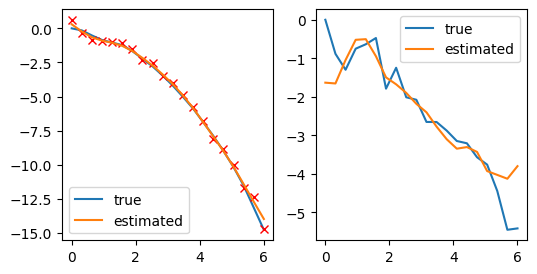

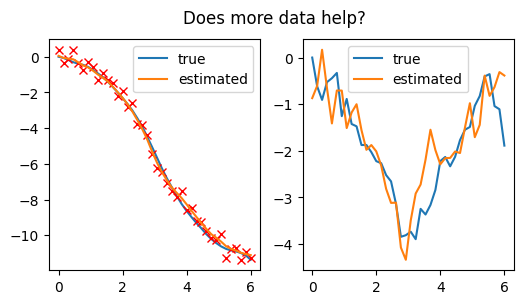

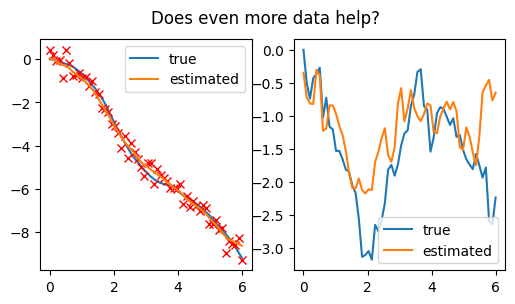

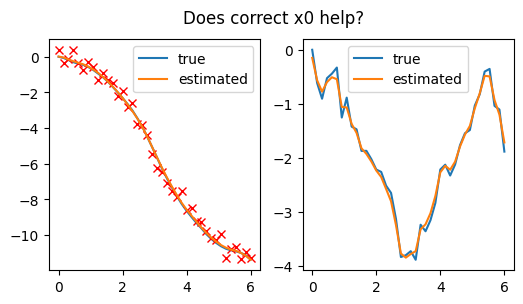

In [40]:
x_hat1, x_dot_hat1, _, _, sigma_hat_1 = kal_exp.solve_prior(
    z1, H1, times1, sigma_z, maxiter=10000
)

plot_sol(times1, z1, x_true1, x_dot_true1, x_hat1, x_dot_hat1)

x_hat2, x_dot_hat2, _, _, sigma_hat_2 = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2, x_dot_hat2, "Does more data help?")

x_hat3, x_dot_hat3, _, _, sigma_hat_3 = kal_exp.solve_prior(
    z3, H3, times3, sigma_z, maxiter=10000
)
plot_sol(times3, z3, x_true3, x_dot_true3, x_hat3, x_dot_hat3, "Does even more data help?")

x0=kal_exp.restack(x_true2, x_dot_true2).reshape((-1,1))
x_hat2b, x_dot_hat2b, _, _, sigma_hat_2b = kal_exp.solve_prior(
    z2, H2, times2, sigma_z, x0=x0, maxiter=10000
)
plot_sol(times2, z2, x_true2, x_dot_true2, x_hat2b, x_dot_hat2b, "Does correct x0 help?")

print(sigma_hat_1, sigma_hat_2, sigma_hat_3, sigma_hat_2b)

### Conclusions
This case performs substantially better than the sinusoidal data case, and I'm unsure why.  Yes, starting at x0 was helpful to find x but not sigma.  However, more data still did not help find sigma.


# Overall Conclusions
Neither method is demonstrating asymptotic efficiency.  Unsure what's going on with marginal likelihood.  Perhaps MAP likelihood is getting caught in a local minimum? (which by motivation, shouldn't happen?) 